In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
 (x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

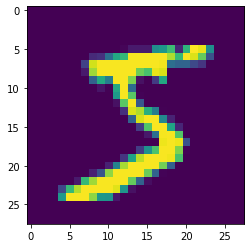

In [7]:
plt.imshow(single_image)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [12]:
y_example[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [14]:
y_cat_train = to_categorical(y_train,10)

In [15]:
single_image.max()

255

In [16]:
x_train = x_train/255

In [17]:
 x_test = x_test/255

In [18]:
scaled_image = x_train[0]

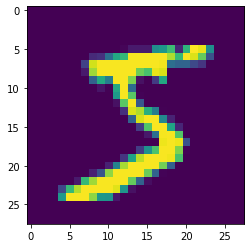

In [19]:
plt.imshow(scaled_image)

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
x_train = x_train.reshape(60000,28,28,1)

In [22]:
x_test = x_test.reshape(10000,28,28,1)

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [25]:
%config Completer.use_jedi = Falseto

In [26]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),
                input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

#m = tf.keras.metrics.Accuracy()
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [29]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),
         callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.1415 - categorical_accuracy: 0.9589 - val_loss: 0.0529 - val_categorical_accuracy: 0.9829
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0489 - categorical_accuracy: 0.9851 - val_loss: 0.0483 - val_categorical_accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0319 - categorical_accuracy: 0.9900 - val_loss: 0.0440 - val_categorical_accuracy: 0.9861
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0207 - categorical_accuracy: 0.9934 - val_loss: 0.0350 - val_categorical_accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0145 - categorical_accuracy: 0.9955 - val_loss: 0.0347 - val_categorical_accuracy: 0.9888
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0113 - categorical_accuracy: 0.9964 - val_loss: 0.0418 - val_categoric

In [30]:
metrics = pd.DataFrame()

<AxesSubplot:>

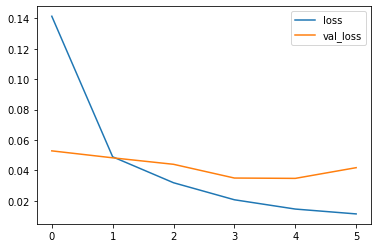

In [31]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

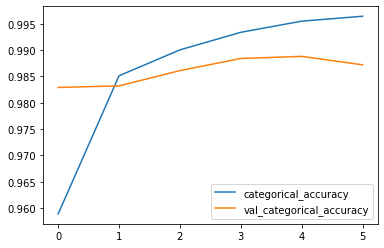

In [33]:
metrics[['categorical_accuracy','val_categorical_accuracy']].plot()

In [34]:
model.metrics_names

['loss', 'categorical_accuracy']

In [35]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.041793543845415115, 0.9872000217437744]

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
predictions = np.argmax(model.predict(x_test), axis=1)

In [49]:
y_cat_test.shape

(10000, 10)

In [50]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       1.00      0.97      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      1.00      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [53]:
confusion_matrix(y_test,predictions)

array([[ 973,    0,    2,    0,    0,    1,    2,    1,    1,    0],
       [   0, 1131,    1,    0,    0,    2,    1,    0,    0,    0],
       [   1,    1, 1025,    0,    0,    0,    0,    5,    0,    0],
       [   0,    0,   10,  984,    0,   11,    0,    1,    1,    3],
       [   0,    0,    0,    0,  974,    0,    2,    0,    1,    5],
       [   0,    0,    1,    2,    0,  888,    1,    0,    0,    0],
       [   2,    2,    1,    0,    1,    2,  949,    0,    1,    0],
       [   0,    3,    5,    1,    0,    0,    0, 1016,    1,    2],
       [   2,    1,    9,    0,    0,    2,    1,    5,  950,    4],
       [   1,    3,    2,    0,    7,    7,    0,    5,    2,  982]],
      dtype=int64)

In [54]:
import seaborn as sns

<AxesSubplot:>

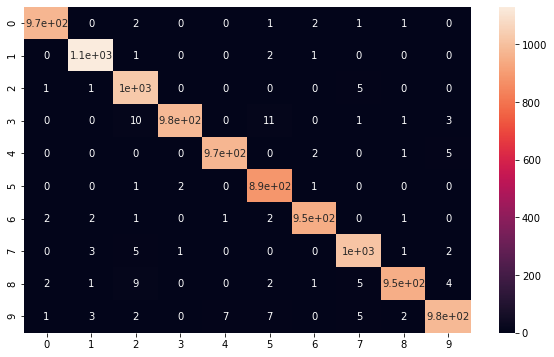

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [56]:
my_number = x_test[0]

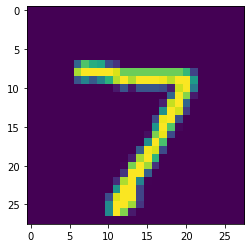

In [57]:
plt.imshow(my_number.reshape(28,28))

In [58]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([7], dtype=int64)